# Accessing synapse and spine info of the MICrONS data

The MICrONS initiative provided a dense reconstruction of around a cubic milimeter of mouse brain tissue.

At OBI, we have converted that data into the SONATA format that is often used to represent biophysically-detailed computational models of neuronal circuitry. We believe that this is a useful resource for the community for the following reasons:
 1. It allows direct comparison of models to the data, as both are in the same format. In the future it may even be possible to simulate the MICrONS circuitry as one simulates the computational models.
 2. There are many useful code libraries for analyzing SONATA-formatted circuits.
 3. It is reduced representation of the data. While this discards a lot of information, what remains is still very useful for many purposes. And the reduced data can be more easily handled and analyzed faster.
 4. During the conversion to SONATA we added derived data. Specifically, high-quality morphology skeletons with extracted spines.


Here, we want to expand on point (4) above. We demonstrate some example of how to access spine- and synapse-related data.

### Summary of the analysis

This is less of an analysis and more of a demonstration of how to access spine- and synapse-related data of the MICrONS data, represented in the SONATA format. It serves to teach you the basics of structural analyses of SONATA circuits.

However, as examples, we calculate the fractions and number of shaft vs. spine synapses of 100 neurons, and the propertions of pre-synaptic neuron types.

## Importing code libraries and loading the data

We import a number of standard packages, as well as _bluepysnap_ and _neurom_. These two packages provide (as we will see) useful functionality for accessing the data in the SONATA format.

In [ ]:
import numpy
import pandas

import bluepysnap as snap
from matplotlib import pyplot as plt

circ_fn = "circuit_config.json"
circ = snap.Circuit(circ_fn)

Displaying node populations

In [112]:
display(list(circ.nodes))

['em_extrinsic', 'microns_intrinsic', 'virtual_microns_intrinsic']

Displaying available node, i.e., neuron properties

In [139]:
node_pop = circ.nodes["microns_intrinsic"]

display(node_pop.property_names)

{'layer',
 'morphology',
 'mtype',
 'orientation_w',
 'orientation_x',
 'orientation_y',
 'orientation_z',
 'pt_root_id',
 'source__pt_supervoxel_id',
 'source__target_id',
 'source__volume',
 'spine_info',
 'synapse_class',
 'x',
 'y',
 'z'}

For the intrinsic population, load a number of available property values and display them

In [114]:
node_properties_to_load = ["layer", "morphology", "mtype", "spine_info", "synapse_class", "x", "y", "z"]
nrn_props = node_pop.get(properties=node_properties_to_load)

display(nrn_props.head())

,layer,morphology,mtype,spine_info,synapse_class,x,y,z
node_ids,,,,,,,,
0,3,_NONE,L3a,_NONE,EXC,1161.280,520.576,711.88
1,3,_NONE,L3a,_NONE,EXC,1162.112,514.240,696.60
2,3,_NONE,L3b,_NONE,EXC,1177.280,535.296,713.52
3,3,_NONE,L3a,_NONE,EXC,1159.552,510.848,718.00
4,4,_NONE,L4b,_NONE,EXC,1167.232,568.448,716.40


As we saw, "morphologies" are only available for a small minority of neurons at this point. 85 to be exact.

We are continously expanding that number.

Here, we create a DataFrame of neurons with available morphologies. Its index "node_ids" provides the identifiers of those neurons for future analyses.

In [116]:
nrn_props = nrn_props.loc[nrn_props["morphology"] != "_NONE"]
display(nrn_props.head())

,layer,morphology,mtype,spine_info,synapse_class,x,y,z
node_ids,,,,,,,,
22951,4,864691136664127454,L4a,spines_864691136664127454,EXC,649.792,637.760,922.80
22984,3,864691135502873666,L3b,spines_864691135502873666,EXC,647.680,575.616,872.96
24054,3,864691134949221372,L3b,spines_864691134949221372,EXC,644.672,553.216,787.92
24392,3,864691134948788476,L3a,spines_864691134948788476,EXC,631.872,565.824,865.92
24471,3,864691135953985800,L3b,spines_864691135953985800,EXC,599.360,543.552,950.12


Display edge populations

In [117]:
edge_pop_names = list(circ.edges)
display(edge_pop_names)

['em_extrinsic__microns_intrinsic__chemical',
 'microns_intrinsic__microns_intrinsic__chemical',
 'virtual_microns_intrinsic__microns_intrinsic__chemical']

Display available edge (i.e., synapse) properties

In [118]:
edge_properties_to_load = list(circ.edges[edge_pop_names[1]].property_names)

display(edge_properties_to_load)

['afferent_synapse_z',
 'afferent_surface_z',
 'afferent_synapse_y',
 'spine_id',
 '@target_node',
 '@source_node',
 'afferent_segment_id',
 'afferent_section_id',
 'afferent_segment_offset',
 'source__id',
 'afferent_synapse_x',
 'source__size',
 'afferent_section_offset',
 'afferent_surface_x',
 'afferent_surface_y']

We pick an exemplary neuron with available morphology.

Then we load its afferent synapse properties from all available edge populations. For that purpose, we define a helper function that iterates over edge populations.

In [122]:
nrn_id = nrn_props.index[10]

def synapses_from_all_edge_populations(nrn_id):
    syns = []; keys=[]
    for edge_pop in edge_pop_names:
        pop_syns = circ.edges[edge_pop].afferent_edges(nrn_id, properties=edge_properties_to_load)
        if len(pop_syns) > 0:
            syns.append(pop_syns)
            keys.append(edge_pop)
    syns = pandas.concat(syns, axis=0, keys=keys, names=["edge_population"])
    return syns

synapses = synapses_from_all_edge_populations(nrn_id)
display(synapses)

afferent_synapse_z  \
edge_population                                                                 
em_extrinsic__microns_intrinsic__chemical          29227               979.84   
                                                   29228               862.20   
                                                   29229               962.96   
                                                   29230               911.56   
                                                   29231               992.36   
...                                                                       ...   
virtual_microns_intrinsic__microns_intrinsic__c... 652955              982.44   
                                                   652956              924.00   
                                                   652957              935.40   
                                                   652958              889.96   
                                                   652959              913.92   

                                                           afferent_surface_z  \
edge_population                                                                 
em_extrinsic__microns_intrinsic__chemical          29227           978.055847   
                                                   29228           862.317993   
                                                   29229           965.073853   
                                                   29230           911.605591   
                                                   29231           992.504761   
...                                                                       ...   
virtual_microns_intrinsic__microns_intrinsic__c... 652955          981.062988   
                                                   652956          924.440918   
                                                   652957           -1.000000   
                                                   652958          890.042297   
                                                   652959          913.439209   

                                                           afferent_synapse_y  \
edge_population                                                                 
em_extrinsic__microns_intrinsic__chemical          29227              368.624   
                                                   29228              496.352   
                                                   29229              469.212   
                                                   29230              396.228   
                                                   29231              437.660   
...                                                                       ...   
virtual_microns_intrinsic__microns_intrinsic__c... 652955             357.340   
                                                   652956             457.032   
                                                   652957             454.104   
                                                   652958             492.760   
                                                   652959             513.776   

                                                           spine_id  \
edge_population                                                       
em_extrinsic__microns_intrinsic__chemical          29227        130   
                                                   29228       4722   
                                                   29229        332   
                                                   29230       2091   
                                                   29231       4457   
...                                                             ...   
virtual_microns_intrinsic__microns_intrinsic__c... 652955        25   
                                                   652956      2103   
                                                   652957        -1   
                                                   652958      4717   
                                             

### Extrinsic vs. intrinsic innervation

With the loaded data, we can already calculate the number of extrinsic vs. intrinsic synapses. A theoretically important quantity.

Note that at the moment we make "extrinsic" synapses only available for neurons with available morphology. In the future we will provide extrinsic info also for other neurons.

In [124]:
synapses.reset_index()["edge_population"].value_counts()

edge_population
em_extrinsic__microns_intrinsic__chemical                 5159
microns_intrinsic__microns_intrinsic__chemical             402
virtual_microns_intrinsic__microns_intrinsic__chemical      14
Name: count, dtype: int64

We saw that most synapses are, indeed extrinsic!

We now write a quick widget that allows to perform that analysis for all neurons. 
Use the slider to iterate over neurons 

In [ ]:
from ipywidgets import widgets

wgt_nrn_id = widgets.IntSlider(min=0, max=len(nrn_props), step=1, value=0)

def display_fun(idx):
    synapses = synapses_from_all_edge_populations(nrn_props.index[idx])
    per_population_count = synapses.reset_index()["edge_population"].value_counts()

    _ = plt.pie(per_population_count, labels=per_population_count.index)

i = widgets.interactive(display_fun, idx=wgt_nrn_id)
display(i)

interactive(children=(IntSlider(value=0, description='idx', max=85), Output()), _dom_classes=('widget-interact…

### Small tangent: Presynaptic neuron types

This is unrelated to spines. But we can also look up the neuron types of the presynaptic neurons.

To that end, we simply use the "get" function of the corresponding pre-synaptic node population for the "mtypes" of the innervating neurons.

Note that this is NOT possible for extrinsic synapses. Because the sources of extrinsic synapse are by definition outside the reconstructed volume, so we have no information about those neurons. 

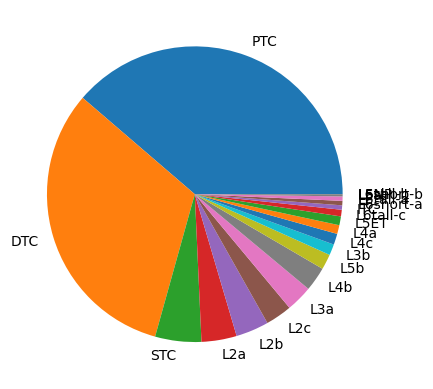

In [95]:
non_extrinsics = synapses.drop(index=["em_extrinsic__microns_intrinsic__chemical"], errors="ignore")

def lookup_presynaptic_property(df_in, property_names):
    edge_pop = df_in.index[0][0]
    source_name = circ.edges[edge_pop].source.name
    lo = circ.nodes[source_name].get(df_in["@source_node"], properties=property_names)
    return lo.reindex(df_in["@source_node"])

pre_mtypes = non_extrinsics.groupby("edge_population").apply(lookup_presynaptic_property, "mtype")
pre_mtype_counts = pre_mtypes.value_counts()

_ = plt.pie(pre_mtype_counts, labels=pre_mtype_counts.index)

The neuron type classification used above uses "PTC" to denote an inhibitory "proximally targeting cell", i.e., a Basket Cell. And "DTC" is an inhibitory "distally targeting cell", i.e. SST-positive neurons.

Again, we can also do this with a little interactive widget.

In [97]:
from ipywidgets import widgets

wgt_nrn_id = widgets.IntSlider(min=0, max=node_pop.count(), step=1, value=0)

def display_fun(nrn_id):
    synapses = synapses_from_all_edge_populations(nrn_id)
    non_extrinsics = synapses.drop(index=["em_extrinsic__microns_intrinsic__chemical"], errors="ignore")
    pre_mtypes = non_extrinsics.groupby("edge_population").apply(lookup_presynaptic_property, ["mtype"])    
    pre_mtype_counts = pre_mtypes["mtype"].value_counts()

    _ = plt.pie(pre_mtype_counts, labels=pre_mtype_counts.index)

i = widgets.interactive(display_fun, nrn_id=wgt_nrn_id)
display(i)

interactive(children=(IntSlider(value=0, description='nrn_id', max=50948), Output()), _dom_classes=('widget-in…

## Finally: Accessing spine data

We write a small helper function to access and load the extracted spine data for a neuron.

We represent spines at three levels of detail:
  1. Surface meshes of spines
  2. Morphology-skeletons of spines, i.e., as line-segments with diameters
  3. As a simple line segment from the root of the spine to its tip.

At the moment and in this example, we only make (3) available. In the future, also (2) and (1) will be released.

In [176]:
import os, json

def read_spine_info(node_pop, nrn_id):
    spines_root = os.path.split(node_pop.config["alternate_morphologies"]["h5v1"])[0]
    spines_root = node_pop.config["alternate_morphologies"]["h5v1"]
    fn = os.path.join(spines_root, nrn_props.loc[nrn_id, "spine_info"]) + ".json"
    with open(fn, "r") as fid:
        spines = json.load(fid)
    return pandas.DataFrame(spines)

spine_info = read_spine_info(node_pop, nrn_id)
display(spine_info.head())

,dendritic_sample_position,direction_vector,index,orientation_vector,surface_sample_position,synaptic_radius
0,"[363.7811279296875, 433.990966796875, 899.8206...","[-0.5775905251502991, 0.5773502588272095, -0.5...",0,"[-0.6422014832496643, 0.28867512941360474, -0....","[363.707763671875, 434.0643005371094, 899.7473...",0.328534
1,"[370.23516845703125, 434.4309997558594, 897.91...","[-0.5771099925041199, 0.5773502588272095, 0.57...",1,"[-0.28855499625205994, 0.7886751294136047, 0.2...","[370.161865234375, 434.50433349609375, 897.986...",0.185558
2,"[404.4123840332031, 453.93975830078125, 786.49...","[-0.5773502588272095, 0.5773502588272095, -0.5...",2,"[-0.5773502588272095, 0.5773502588272095, -0.5...","[404.2657165527344, 454.08642578125, 786.34777...",0.000000
3,"[404.55908203125, 435.31109619140625, 898.2069...","[-0.7074009776115417, 0.0, -0.7068124413490295]",3,"[-0.27302175760269165, 0.39079609513282776, -0...","[404.4857177734375, 435.31109619140625, 898.13...",1.240773
4,"[414.9002380371094, 624.0912475585938, 852.289...","[0.9701247215270996, -0.24260686337947845, 0.0]",4,"[0.9511599540710449, -0.11787564307451248, 0.0]","[415.193603515625, 624.0178833007812, 852.2896...",0.387146


## Fractions of shaft- and spine-synapses

We use the above to calculate for all neurons their numbers of spine- and shaft-synapses. 

In [ ]:
for nrn_id in nrn_props.index:
    spines = read_spine_info(node_pop, nrn_id)
    nrn_props.loc[nrn_id, "spine_count"] = len(spines)  # Each row of the DataFrame is a spine. Hence len is the spine count.
    
    syns = synapses_from_all_edge_populations(nrn_id)
    count_on_spines = (syns["spine_id"] > -1).sum()
    count_on_shafts = (syns["spine_id"] <= -1).sum()
    nrn_props.loc[nrn_id, "syn_count_on_spines"] = count_on_spines
    nrn_props.loc[nrn_id, "syn_count_on_shafts"] = count_on_shafts


For all exemplars with spines and morphologies available, we plot the numbers of spine and shaft synapses and the total numbers of spines.

We see that in this dataset only about 90% of spines actually hold a synapse. At this point we do not know if that is biological, or an artifact of our data processing. We are investigating.

[Text(0, -10000.0, '10000.0'),
 Text(0, -7500.0, '7500.0'),
 Text(0, -5000.0, '5000.0'),
 Text(0, -2500.0, '2500.0'),
 Text(0, 0.0, '0.0'),
 Text(0, 2500.0, '2500.0'),
 Text(0, 5000.0, '5000.0'),
 Text(0, 7500.0, '7500.0'),
 Text(0, 10000.0, '10000.0'),
 Text(0, 12500.0, '12500.0'),
 Text(0, 15000.0, '15000.0')]

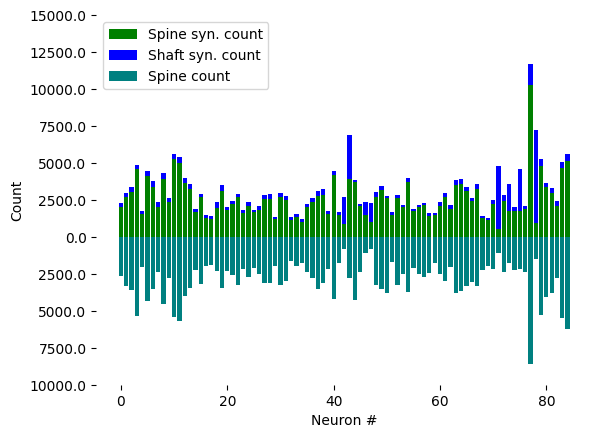

In [178]:
plt.bar(range(len(nrn_props)), nrn_props["syn_count_on_spines"],
        color="green", label="Spine syn. count")
plt.bar(range(len(nrn_props)), 
        nrn_props["syn_count_on_shafts"],
        bottom=nrn_props["syn_count_on_spines"],
        color="blue", label="Shaft syn. count")
plt.bar(range(len(nrn_props)), -nrn_props["spine_count"],
        color="teal", label="Spine count")

ax = plt.gca()
plt.legend()
ax.set_frame_on(False)
ax.set_xlabel("Neuron #")
ax.set_ylabel("Count")
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(numpy.abs(ax.get_yticks()))

## Plot exemplar morphology and its synapses

We plot an examplar morphology and all its afferent synapses. 

Shaft synapses in blue, spine synapses in green.

We see the shaft synapses are more prevalent around the soma than elsewhere. This is easier to see if you uncomment the last code line to zoom into the soma a bit more.

/Users/mwr/venvs/entitysdk_notebook/lib/python3.13/site-packages/morph_tool/transform.py:41: RuntimeWarning: divide by zero encountered in dot
  return np.dot(np.column_stack((p, np.ones(len(p)))), A)[:, :3]
/Users/mwr/venvs/entitysdk_notebook/lib/python3.13/site-packages/morph_tool/transform.py:41: RuntimeWarning: overflow encountered in dot
  return np.dot(np.column_stack((p, np.ones(len(p)))), A)[:, :3]
/Users/mwr/venvs/entitysdk_notebook/lib/python3.13/site-packages/morph_tool/transform.py:41: RuntimeWarning: invalid value encountered in dot
  return np.dot(np.column_stack((p, np.ones(len(p)))), A)[:, :3]


(400.0, 800.0)

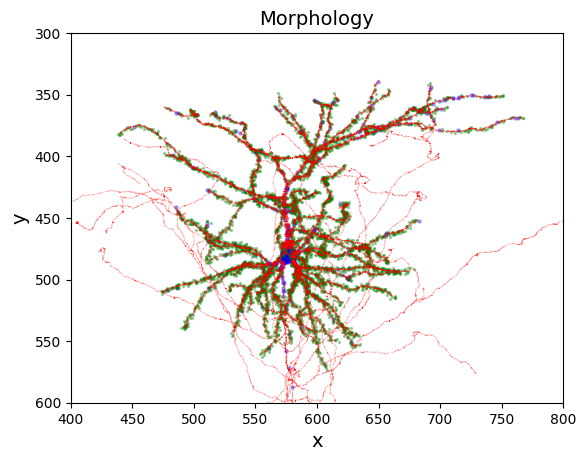

In [174]:
import neurom
import neurom.view

morph = neurom.load_morphology(node_pop.morph.get(nrn_id, extension="swc", transform=True))
syns = synapses_from_all_edge_populations(nrn_id)

neurom.view.plot_morph(morph, diameter_scale=3)
ax = plt.gca()
ax.scatter(syns.afferent_synapse_x[syns.spine_id == -1],
           syns.afferent_synapse_y[syns.spine_id == -1], s=5, alpha=0.3, color="blue")
ax.scatter(syns.afferent_synapse_x[syns.spine_id != -1],
           syns.afferent_synapse_y[syns.spine_id != -1], s=2, alpha=0.3, color="green")

ax.set_ylim([600, 300]); ax.set_xlim([400, 800])
# To zoom into the soma
# ax.set_ylim([500, 450]); ax.set_xlim([550, 600])

## Plot exemplar morphology, synapses -- and SPINES

We plot the same exemplar again, this time also with the extracted spines.

As mentioned above, at this point we only offer the very reduced representation of spines as lines. But soon more involved representations will be available. 

Still, we can see nicely how each spine projects outwards from its dendrite to "catch" its associated synapse.

/Users/mwr/venvs/entitysdk_notebook/lib/python3.13/site-packages/morph_tool/transform.py:41: RuntimeWarning: divide by zero encountered in dot
  return np.dot(np.column_stack((p, np.ones(len(p)))), A)[:, :3]
/Users/mwr/venvs/entitysdk_notebook/lib/python3.13/site-packages/morph_tool/transform.py:41: RuntimeWarning: overflow encountered in dot
  return np.dot(np.column_stack((p, np.ones(len(p)))), A)[:, :3]
/Users/mwr/venvs/entitysdk_notebook/lib/python3.13/site-packages/morph_tool/transform.py:41: RuntimeWarning: invalid value encountered in dot
  return np.dot(np.column_stack((p, np.ones(len(p)))), A)[:, :3]


(550.0, 600.0)

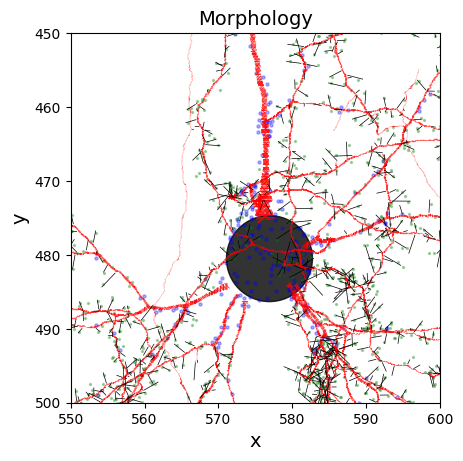

In [183]:
import neurom
import neurom.view

morph = neurom.load_morphology(node_pop.morph.get(nrn_id, extension="swc", transform=True))
syns = synapses_from_all_edge_populations(nrn_id)
spines = read_spine_info(node_pop, nrn_id)

neurom.view.plot_morph(morph, diameter_scale=3)
ax = plt.gca()
ax.scatter(syns.afferent_synapse_x[syns.spine_id == -1],
           syns.afferent_synapse_y[syns.spine_id == -1], s=5, alpha=0.3, color="blue")
ax.scatter(syns.afferent_synapse_x[syns.spine_id != -1],
           syns.afferent_synapse_y[syns.spine_id != -1], s=2, alpha=0.3, color="green")

for _, spine in spines.iterrows():
    spine_root = numpy.array(spine.surface_sample_position)
    spine_dir = numpy.array(spine.orientation_vector)
    spine_dir = spine.synaptic_radius * spine_dir / numpy.linalg.norm(spine_dir)
    ax.plot([spine_root[0], spine_root[0] + spine_dir[0]],
            [spine_root[1], spine_root[1] + spine_dir[1]],
            color="black", lw=0.5)

ax.set_ylim([600, 300]); ax.set_xlim([400, 800])
# To zoom into the soma
ax.set_ylim([500, 450]); ax.set_xlim([550, 600])

## Calculating synapse path distances to the soma.

The synapse properties "afferent_section_id", "afferent_segment_id", "afferent_segment_offset" map each synapse to a location on the morphology skeleton. 

Hence, that information can be used to rapidly calculate path distances between pairs of synapses. Or the path distance of a synapse to the soma. This information is useful for applications in the field of dendritic clustering of synapses.

**NOTE**: What is calculated is the path distance from the root of the spine of a synapse, not including the length of the spine itself.

Here, we calculate for all synapses their path distance to the soma (represented by section and segment id 0) and create a histogram.

Text(0, 0.5, 'Synapse count')

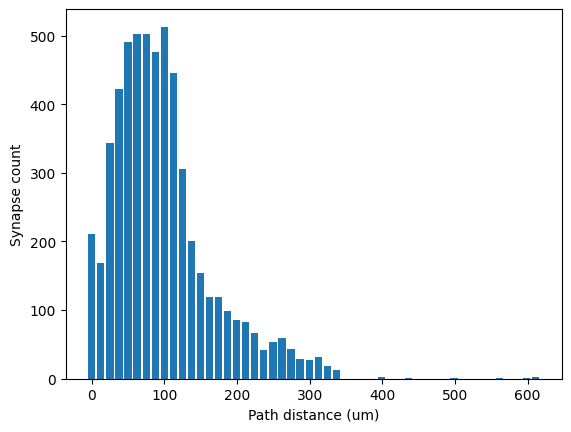

In [194]:
from conntility.subcellular import MorphologyPathDistanceCalculator

calc = MorphologyPathDistanceCalculator(morph.to_morphio())
relevant_cols = ["afferent_section_id", "afferent_segment_id", "afferent_segment_offset"]
soma = pandas.DataFrame({
    "afferent_section_id": [0], "afferent_segment_id": [0], "afferent_segment_offset": [0]
})

pds = calc.path_distances(soma, syns[relevant_cols])

H = numpy.histogram(pds, bins=50)
plt.bar(H[1][:-1], H[0], width=0.8*numpy.mean(numpy.diff(H[1])))
plt.gca().set_xlabel("Path distance (um)")
plt.gca().set_ylabel("Synapse count")